
**Завдання 1**: Завантажте дані `medical-charges.csv` в пандас датафрейм і виведіть перші 5 записів. Напишіть, як ви можете підійти до вирішення задачі прогнозування колонки `charges` на основі інших колонок виходячи з наявних на даний момент знань (без ML методів, чисто з використанням аналітики). Запишіть 3 або більше ідей, які приходять вам на думку нижче:

In [56]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

In [57]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [58]:
medical_df = pd.read_csv("/content/drive/MyDrive/Machine Learning/Data/medical-charges.csv")
medical_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Для вирішення задачі прогнозування колонки charges я би провела exploratory data analysis з наступними кроками:
1. Візуалізація даних щоб зрозуміти статистичні характеристики змінних і зв`язки між ними.
2. Кореляціний аналіз для визначення зв'язків між змінними.
3. Визначення найкращих предикторів charges на основі цього аналізу.

**Завдання 2**: Візуалізуйте розподіл медичних зборів (`charges`) у вигляді інтерактивної гістограми plotly з розбиттями за категоріями ознак
1. `sex`
2. `region`

Додайте маржинальний графік у вигляді бокс-плота вгорі по дикретним категоріям ознак.
Скористайтесь прикладом візуалізації з лекції.
Опишіть свої спостереження.

In [59]:
fig = px.histogram(medical_df,
                   x='charges',
                   marginal='box',
                   color='sex',
                   color_discrete_sequence=['pink', 'blue'],
                   title='Annual Medical Charges by Sex')
fig.update_layout(bargap=0.1)
fig.show()

Спостереження:

Медіана медичних зборів для жінок і чоловіків практично однакова, однак третій квартиль і максимальне значення для чоловіків значно вищі.

In [60]:
fig = px.histogram(medical_df,
                   x='charges',
                   marginal='box',
                   color='region',
                   #color_discrete_sequence=['pink', 'blue'],
                   title='Annual Medical Charges by Region')
fig.update_layout(bargap=0.1)
fig.show()

Спостереження:

Можемо побачити, що медичні збори доволі суттєво відрізняються від регіону до регіону. Якщо мінімальні, значення першого квартиля і медіана співставні, то значення третього квартиля і максимальне між регіонами можуть відрізнятись в півтора рази.

**Завдання 3**: Візуалізуйте з `plotly` розподіл кожного з настуних стовпців відносно того, чи є людина курцем (`smoker`)
- `region`
- `children`

та опишіть коротко свої спостереження.

In [72]:
px.histogram(medical_df, x='smoker', color='children', title='Smokers Distribution by Сhildren Count', histnorm='percent')

In [ ]:
medical_df.children.value_counts(normalize=True)

children
0    0.428999
1    0.242152
2    0.179372
3    0.117339
4    0.018685
5    0.013453
Name: proportion, dtype: float64

Спостереження:


Курці складають 19-25% вибірки, винятком тут є люди з 4 і 5 дітьми, серед яких курці складають 12 і 5% відповідно, однак таке відхилення може бути пов язано із тим, що вибірка багатодітних є маленькою.

In [73]:
px.histogram(medical_df, x='smoker', color='region', title='Smokers Distribution by Region', histnorm='percent')

Спостереження:

Курці становлять 18-25% від вибірки населення регіону. Найбільший відсоток курців серед жителів Південного Сходу.

**Завдання 4**: Візуалізуйте звʼязок між стовпцем `charges` та `children` використовуючи графіки-скрипки (`px.violin`). Опишіть свої спостереження.

In [65]:
px.violin(medical_df, x="charges", color="children", box=True, title='Charges by Сhildren Number')

Статистичні характеристики для категорії людей з 5 дітьми доволі сильно відрізняються від інших, але це ймовірно пов`язано з маленьким розміром вибірки. Загалом же не прослідковується якийсь суттєвий зв'язок між кількістю дітей та медичними зборами.

**Завдання 5.** Розглянемо модель для користувачів, які не є курцями (`no_smoker_df`):

$$charges = w \times age + b$$

Спробуйте 3 різні пари параметрів `w` та `b` аби вручну підігнати лінію під дані використовуючи наведені допоміжні функції `estimate_charges` та `try_parameters`. Опишіть спостереження.
Пари параметрів мають бути НЕ такі, як були наведені в лекції.

In [ ]:
non_smoker_df = medical_df[medical_df.smoker == 'no']

In [ ]:
def estimate_charges(age, w, b):
    return w * age + b

In [ ]:
def try_parameters(df, w, b):
    ages = df.age
    target = df.charges

    estimated_charges = estimate_charges(ages, w, b)

    plt.plot(ages, estimated_charges, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual']);

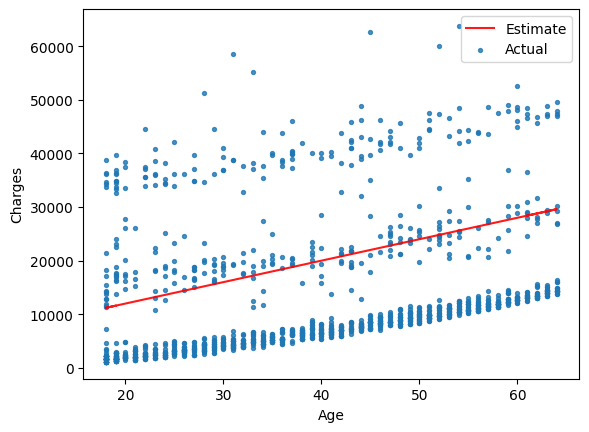

In [ ]:
w1 = 400
b1 = 4000
try_parameters(medical_df, w1, b1)

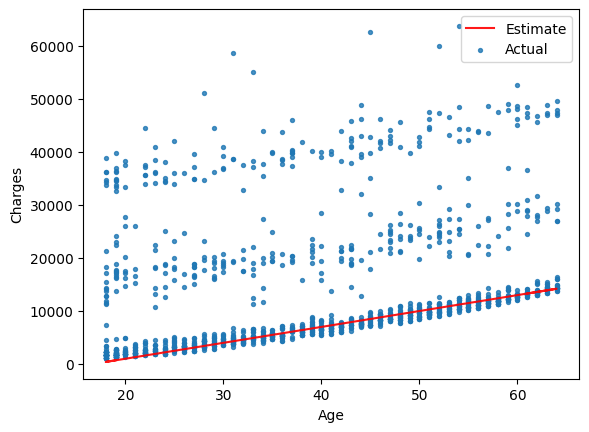

In [ ]:
w2 = 300
b2 = -5000
try_parameters(medical_df, w2, b2)

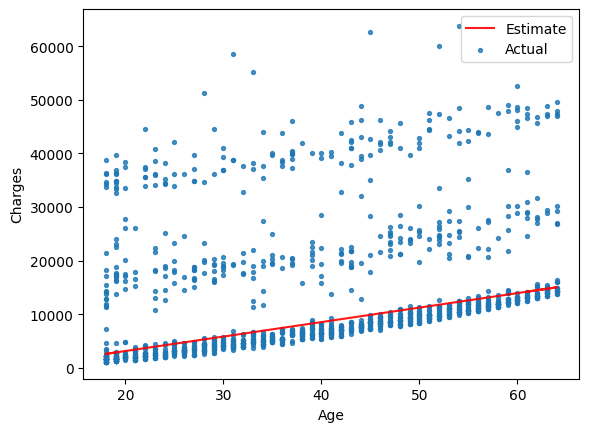

In [70]:
w3 = 270
b3 = -2250
try_parameters(medical_df, w3, b3)

Спостереження:

Ми маємо постаратись підібрати такі параметри нахилу і зміщення лінії, щоби вона проходила через скупчення точок внизу графіка, ближче до його "верху", адже так вона буде трохи ближче до двох менших скупчень. Третя пара параметрів, на мою думку, підходить непогано.

**Завдання 6**: Напишіть фукнцію для обчислення root mean squared error згідно з формулою цієї метрики точності моделі з використанням `numpy`.

Обчисліть RMSE для тих пар пареметрів, які Ви спробували в завданні 5.

Яке найнижче значення втрат ви зможете досягти? Чи можете ви придумати загальну стратегію для знаходження кращих значень $w$ та $b$ методом проб та помилок?

In [ ]:
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

In [ ]:
targets = non_smoker_df['charges']

In [ ]:
prediction1 = estimate_charges(non_smoker_df.age, w1, b1)
rmse(targets, prediction1)

12384.281326805974

In [ ]:
prediction2 = estimate_charges(non_smoker_df.age, w2, b2)
rmse(targets, prediction2)

4956.973980899423

In [71]:
prediction3 = estimate_charges(non_smoker_df.age, w3, b3)
rmse(targets, prediction3)

4662.937111939916

Загальна стратегія підбору найкращих параметрів методом проб і помилок:

Побудувати графік і обчислити функцію втрат з рандомними параметрами. Спробувати змінити їх, зрозуміти як зменшення або збільшення впливає на розташування лінії та втрати. Підлаштовувати їх в цьому напрямку поки вони не почнуть ставати гірше, що означатиме, що оптимальне значення було пройдено. Повернутись до оптимального значення.